# Project: Investigate the IMDB Dataset 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#questions">Questions</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

For this project I will be investigating the IMDB Dataset.  This dataset contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.

### Dataset Column Descriptions

<b>Popularity: </b>Popularity is based on user interactions on the IMDB data website. It is calculated based on things like page views, users adding it to a list, users rating it, etc. Release date also plays a part with recently released shows weighted higher in popularity.

<b>Budget: </b> The budget is the amount of money in American Dollars (USD) spent to make the movie.

<b>Budget Inflation Adjusted: </b> The inflation adjusted budget is the amount of money in American Dollars (USD) spent to make the movie adjusted for inflation since the movie was released.

<b>Revenue: </b> The revenue is the amount of money in American Dollars (USD) that a movie earned.

<b>Revenue Inflation Adjusted: </b> The inflation adjusted revenue is the amount of money in American Dollars (USD) earned by a movie adjusted for inflation since the movie was released.
    
<b>Original Title: </b> The original title is the title used in the original version of the film. 

<b>Cast: </b> The cast of the original (not dubbed or extended) version.

<b>Homepage: </b>The movie homepages are now supported for all translations with only official links  allowed. When there is no official website (e.g. https://itthemovie.com), the producer or main distributor's website is allowed.

<b>Director: </b> Director of the movie.
    
<b>Tagline: </b> A movie tagline is usually a short promotional text used on the poster.

<b>Overview: </b> Overviews should be to the point, spoiler-free and brief. A few lines at most. No (actor name) or technical info.

<b>Keywords: </b> A keyword is a word (or group of connected words) attached to a title (movie / TV series / TV episode) to describe any notable object, concept, style or action that takes place during a title. The main purpose of keywords is to allow visitors to easily search and discover titles.

<b>Genres: </b> The list of official genres for movies.

<b>Production Companies: </b> List of companies that produced the movie.

<b>Release Year: </b> Year of original release.

<b>Release Date:</b> Date of original release.
    
<b>Runtime:</b> The runtime of the original release of the movie.

<b>Vote Count:</b> Number of votes for a movie.

<b>Vote Weighted Average:</b> All the registered members of IMDb can cast their votes/ratings for any movie. IMDb takes all the individual votes cast by the registered users and uses them to calculate a single rating. The rating displayed on a movie's page is a weighted average rating. Though some of the websites claim that they know how weighted average of IMDb works, IMDb itself has never given out the method that they use for the fear of it being manipulated. They state on their website that they use the same method for all the movies without any bias so that the ratings are fair.

<a id='questions'></a>
## Questions for Analysis
<ul>
<b>
<li><a href="#question1">Which genres are most popular from year to year?</a></li>
<li><a href="#question2">Which genres have the highest vote average each month?</a></li>
<li><a href="#question3">Which keywords are most frequent by decade?</a></li>
<li><a href="#question4">What properties are associated with movies that have women directors?</a></li>
</b>
</ul>

In [19]:
#imports
%matplotlib inline
import numpy as np
import pandas as pd
import csv
import datetime
import matplotlib.pyplot as plt
from matplotlib import cm

<a id='wrangling'></a>
## Data Wrangling Summary

In this section I will:

<ul>
<li><a href="#load">Load the data and begin data wrangling.</a></li>
<li><a href="#checkcleanliness">Check for cleanliness by running statistics.</a></li>
<li><a href="#cleansummary">Summarize dataset cleaning operations to be performed.</a></li>
<li><a href="#performclean">Perform data cleaning.</a></li>
<li><a href="#verifyclean">Verify cleanliness by re-running statistics.</a></li>
</ul>

<a id='load'></a>
### Load the data and begin data wrangling

In [20]:
#Load the tmdb-movies dataset
tmdb_movie_df = pd.read_csv('tmdb-movies.csv')
print("Number of rows in the original dataset: " + str(len(tmdb_movie_df)))

#Convert the release date from string to date time
tmdb_movie_df['release_date'] = pd.to_datetime(tmdb_movie_df['release_date'])
#Extract month and create a new column
tmdb_movie_df['release_month'] = tmdb_movie_df['release_date'].dt.month

#Remove the budget and revenue columns in favor of the inflation adjusted columns
tmdb_movie_df.drop('budget', axis=1, inplace=True)
tmdb_movie_df.drop('revenue', axis=1, inplace=True)

#List a sample of data for 
tmdb_movie_df.head(1)

Number of rows in the original dataset: 10866


,id,imdb_id,popularity,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,release_month
0,135397,tt0369610,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,6


<a id='checkcleanliness'></a>
### Check for Cleanliness by Running Statistics

In [21]:
#Count the number of null values in each of the columns
print(tmdb_movie_df.isnull().sum(axis = 0))

#Use describe for summary table of statistics for numeric columns
tmdb_movie_df.describe().transpose()

id                         0
imdb_id                   10
popularity                 0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
release_month              0
dtype: int64


,count,mean,std,min,25%,50%,75%,max
id,10866.0,6.606418e+04,9.213014e+04,5.000000,10596.250000,20669.000000,7.561000e+04,4.178590e+05
popularity,10866.0,6.464410e-01,1.000185e+00,0.000065,0.207583,0.383856,7.138170e-01,3.298576e+01
runtime,10866.0,1.020709e+02,3.138141e+01,0.000000,90.000000,99.000000,1.110000e+02,9.000000e+02
vote_count,10866.0,2.173897e+02,5.756191e+02,10.000000,17.000000,38.000000,1.457500e+02,9.767000e+03
vote_average,10866.0,5.974922e+00,9.351418e-01,1.500000,5.400000,6.000000,6.600000e+00,9.200000e+00
release_year,10866.0,2.001323e+03,1.281294e+01,1960.000000,1995.000000,2006.000000,2.011000e+03,2.015000e+03
budget_adj,10866.0,1.755104e+07,3.430616e+07,0.000000,0.000000,0.000000,2.085325e+07,4.250000e+08
revenue_adj,10866.0,5.136436e+07,1.446325e+08,0.000000,0.000000,0.000000,3.369710e+07,2.827124e+09
release_month,10866.0,6.827259e+00,3.441802e+00,1.000000,4.000000,7.000000,1.000000e+01,1.200000e+01


In [22]:
import pandas_profiling
# Use Profile Report to look at additional cleanliness statistics
pandas_profiling.ProfileReport(tmdb_movie_df)

Number of variables,20
Number of observations,10866
Total Missing (%),6.2%
Total size in memory,1.7 MiB
Average record size in memory,160.0 B
Numeric,9
Categorical,10
Boolean,0
Date,1
Text (Unique),0
Rejected,0


<a id='cleansummary'></a>
### Summary of Dataset Cleanliness:

1) There is one duplicate row in the dataset that should be removed.

2) Several fields have null values.  Based on the questions I wanted to explore, genres is the one of interest. Below I will remove the 23 rows where the genres is null which is only .2% of the rows in the dataset. 

3) The year portion of the release date field is only two digits and therefore not meaningful.  The release year is captured in another field. This will be noted in the analysis section below.

4) The budget and revenue fields have >50% values equal to zero. I will focus on other areas of analysis and decided to leave them in.

<a id='performclean'></a>
### Perform Data Cleaning 

In [23]:
#Remove the duplicate row in the dataset
tmdb_movie_df.drop_duplicates()

#Remove the rows where the genre is empty
tmdb_movie_df = tmdb_movie_df[tmdb_movie_df['genres'].notnull()]
print("Number of rows in the dataset after removing null genres: " + str(len(tmdb_movie_df)))

Number of rows in the dataset after removing null genres: 10843


<a id='verifyclean'></a>
### Verify Cleanliness by Re-running Statistics

In [24]:
#Verify genres null values is zero
print(tmdb_movie_df.isnull().sum(axis = 0))

#Use describe for summary table of statistics for numeric columns
tmdb_movie_df.describe().transpose()

id                         0
imdb_id                    8
popularity                 0
original_title             0
cast                      75
homepage                7912
director                  42
tagline                 2806
keywords                1475
overview                   3
runtime                    0
genres                     0
production_companies    1016
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
release_month              0
dtype: int64


,count,mean,std,min,25%,50%,75%,max
id,10843.0,6.586849e+04,9.197739e+04,5.000000,10589.500000,20558.000000,7.518200e+04,4.178590e+05
popularity,10843.0,6.474559e-01,1.000986e+00,0.000065,0.208253,0.384555,7.153495e-01,3.298576e+01
runtime,10843.0,1.021375e+02,3.129332e+01,0.000000,90.000000,99.000000,1.110000e+02,9.000000e+02
vote_count,10843.0,2.178137e+02,5.761554e+02,10.000000,17.000000,38.000000,1.460000e+02,9.767000e+03
vote_average,10843.0,5.973974e+00,9.342603e-01,1.500000,5.400000,6.000000,6.600000e+00,9.200000e+00
release_year,10843.0,2.001316e+03,1.281330e+01,1960.000000,1995.000000,2006.000000,2.011000e+03,2.015000e+03
budget_adj,10843.0,1.758827e+07,3.433299e+07,0.000000,0.000000,0.000000,2.093530e+07,4.250000e+08
revenue_adj,10843.0,5.147332e+07,1.447664e+08,0.000000,0.000000,0.000000,3.387655e+07,2.827124e+09
release_month,10843.0,6.827446e+00,3.440379e+00,1.000000,4.000000,7.000000,1.000000e+01,1.200000e+01


<a id='eda'></a>
## Exploratory Data Analysis

### Helper Functions for Graphing

In [25]:
# Define function for plotting a graph line
def plot_line(df, x_axis, y_axis, line_color, label):
    plt.style.use('seaborn-darkgrid')
    # Plot the Action genre over time
    plt.plot(df[x_axis], df[y_axis], marker='', color=line_color, linewidth=1, alpha=0.9, label=label)

In [26]:
# Define function for plotting a pie chart
def plot_pie(df, measure, labels):
    
    plt.figure(figsize=(10,10))
    plt.pie(
        df[measure],
        labels=df[labels],
        # with no shadows
        shadow=False,
        startangle=90,
        # with the percent listed as a fraction
        autopct='%1.1f%%',
        )

    # View the plot drop above
    plt.axis('equal')

    # View the plot
    plt.tight_layout()
    plt.show()

<a id='question1'></a>
## Research Question 1: Which genres are most popular from year to year? 

### Research Question 1: Perform Data Wrangling

In [28]:
#Explode the genres field
tmdb_movie_explode_genres_df = tmdb_movie_df.drop('genres', axis=1).join(tmdb_movie_df['genres'].str.split('|', expand=True).stack().reset_index(level=1, drop=True).rename('genres'))
tmdb_movie_explode_genres_df.reset_index(drop=True, inplace=True)

# List a row to verify data was exploded correctly
tmdb_movie_explode_genres_df.head(1)

,id,imdb_id,popularity,original_title,cast,homepage,director,tagline,keywords,overview,runtime,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,release_month,genres
0,135397,tt0369610,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,6,Action


In [30]:
# Calculate number of release year for plotting
tmdb_movie_release_years_df = tmdb_movie_explode_genres_df.groupby(['release_year'])
number_release_years = len(tmdb_movie_release_years_df)
print("Number of Release Years: " + str(number_release_years))

Number of Release Years: 56


In [31]:
# Group data by release year and genre and list them by popularity
tmdb_movie_df_by_popular_genre = tmdb_movie_explode_genres_df.groupby(['release_year', 'genres'])['popularity'].max().reset_index().groupby('release_year').apply(lambda grp: grp.nlargest(20,'popularity'))
tmdb_movie_df_by_popular_genre.reset_index(drop=True, inplace=True)

# List a row to verify data was grouped correctly
tmdb_movie_df_by_popular_genre.head(1)

,release_year,genres,popularity
0,1960,Drama,2.610362


### Research Question 1: Table 1: Which genres are most popular from year to year?
As you can see in the table below <b>Action</b> was the most popular genre for a most release years.  Followed by <b>Adventure, Crime, Drama and Animation, Comedy, and Music</b>.

In [32]:
most_popular_genres = tmdb_movie_explode_genres_df.groupby(['release_year', 'genres'])['popularity'].max().reset_index().groupby('release_year').apply(lambda grp: grp.nlargest(1,'popularity'))
most_popular_genres['genres'].reset_index(drop=True).value_counts()

Action       28
Adventure     9
Crime         6
Drama         5
Animation     4
Comedy        3
Music         1
Name: genres, dtype: int64

### Research Question 1: Table 2: Which genres are most popular from year to year?
Here are the most popular genres for each year:

In [33]:
most_popular_genres.head(number_release_years)

,,release_year,genres,popularity
release_year,,,,
1960,4,1960,Drama,2.610362
1961,17,1961,Adventure,2.631987
1962,33,1962,Action,3.170651
1963,50,1963,Action,2.508235
1964,67,1964,Action,3.153791
1965,85,1965,Action,1.910465
1966,105,1966,Animation,1.227582
1967,122,1967,Adventure,2.550704
1968,139,1968,Adventure,3.309196


### Research Question 1: Graph 1: Action Genre Popularity Over Release Years

Text(0.5, 0.98, 'Action Genre Popularity Over Release Years')

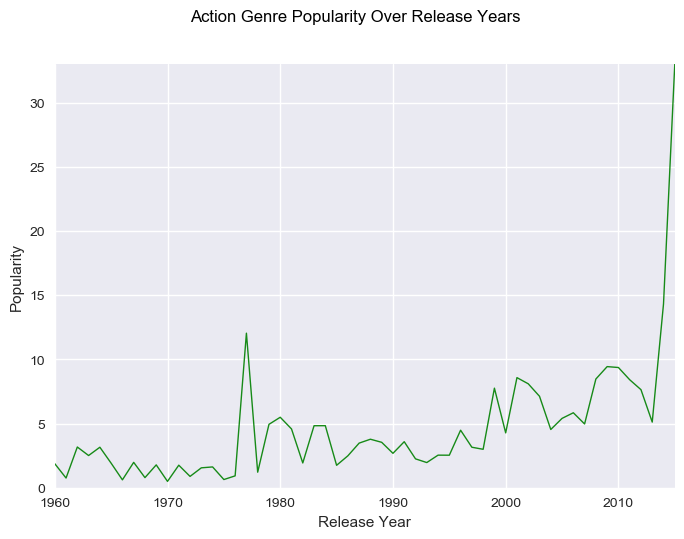

In [34]:
# libraries and data
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
import pandas as pd
 
# Plot the Action genre over time
genre_popularity_df = tmdb_movie_df_by_popular_genre.loc[tmdb_movie_df_by_popular_genre['genres'] == "Action"]
plot_line(genre_popularity_df, "release_year", "popularity", "green", "Action")
    
# Set limits for the graph
plt.xlim(most_popular_genres["release_year"].min(), most_popular_genres["release_year"].max ())
plt.ylim(0, tmdb_movie_df["popularity"].max())
   
# Axis title
plt.xlabel('Release Year')
plt.ylabel('Popularity')
 
# Set a general title
plt.suptitle("Action Genre Popularity Over Release Years", fontsize=12, fontweight=1, color='black')

<a id='question2'></a>
## Research Question 2 : Which genres have the highest vote average each month?

### Research Question 2:  Table 1: Which genres have the highest vote average each month?
Here are the genres with the highest vote avereage each month:

In [35]:
tmdb_movie_df_genre_by_month = tmdb_movie_explode_genres_df.groupby(['release_month', 'genres'])['vote_average'].max().reset_index().groupby('release_month').apply(lambda grp: grp.nlargest(1,'vote_average'))
tmdb_movie_df_genre_by_month.reset_index(drop=True, inplace=True)
tmdb_movie_df_genre_by_month.head(12)

,release_month,genres,vote_average
0,1,Documentary,8.9
1,2,Documentary,8.4
2,3,Crime,8.3
3,4,Music,8.4
4,5,Documentary,8.5
5,6,Documentary,8.4
6,7,Music,8.7
7,8,Music,8.4
8,9,Documentary,9.2
9,10,Documentary,8.8


### Research Question 2:  Table 2: The <i>Documentary</i> genre is most frequently the highest vote average each month

In [36]:
highest_vote_average_by_month = tmdb_movie_explode_genres_df.groupby(['release_month', 'genres'])['vote_average'].max().reset_index().groupby('release_month').apply(lambda grp: grp.nlargest(1,'vote_average'))
highest_vote_average_by_month['genres'].reset_index(drop=True).value_counts()

Documentary    6
Music          4
Drama          1
Crime          1
Name: genres, dtype: int64

### Research Question 2: Graph 1: Documentary vs Action Genres Vote Average by Release Month

Text(0.5, 0.98, 'Documentary vs Action Genres Vote Average by Release Month')

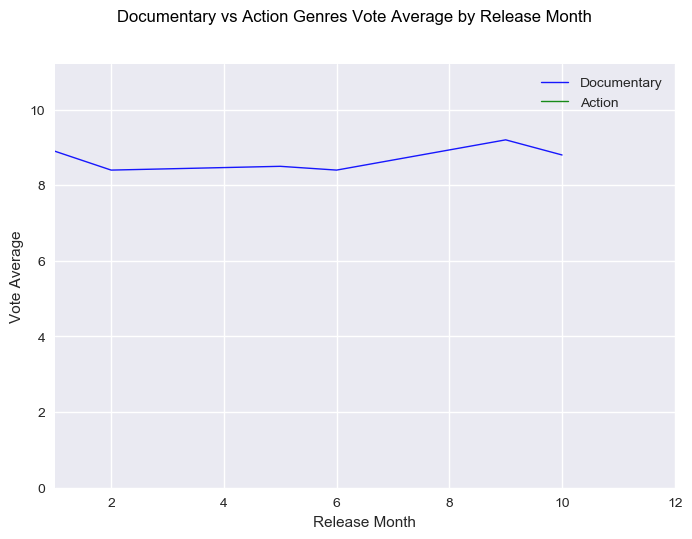

In [38]:
# Plot the Action genre over time
documentary_vote_average_df = tmdb_movie_df_genre_by_month.loc[tmdb_movie_df_genre_by_month['genres'] == "Documentary"]
plot_line(documentary_vote_average_df, "release_month", "vote_average", "blue", "Documentary")
action_vote_average_df = tmdb_movie_df_genre_by_month.loc[tmdb_movie_df_genre_by_month['genres'] == "Action"]
plot_line(action_vote_average_df, "release_month", "vote_average", "green", "Action")
      
# Set limits for the graph
plt.xlim(1, 12)
plt.ylim(0, tmdb_movie_df["vote_average"].max() + 2)
   
# Axis title
plt.xlabel('Release Month')
plt.ylabel('Vote Average')

plt.legend()
 
# Set a general title
plt.suptitle("Documentary vs Action Genres Vote Average by Release Month", fontsize=12, fontweight=1, color='black')

<a id='question3'></a>
## Research Question 3 : Which keywords are most frequent by decade?

### Research Question 3 :  Perform Data Wrangling 

In [39]:
#Explode the keyword field
tmdb_movie_explode_keywords_df = tmdb_movie_df.drop('keywords', axis=1).join(tmdb_movie_df['keywords'].str.split('|', expand=True).stack().reset_index(level=1, drop=True).rename('keywords'))
tmdb_movie_explode_keywords_df.reset_index(drop=True, inplace=True)

# List a row to verify data was exploded correctly
tmdb_movie_explode_keywords_df.head(1)

,id,imdb_id,popularity,original_title,cast,homepage,director,tagline,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,release_month,keywords
0,135397,tt0369610,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,6,monster


### Research Question 3: Table 1 : Which keywords have the highest count?
Overall the most freqent keywords are <b>woman director, independent film and based on a novel</b>

In [40]:
# Display keywords with the highest count
tmdb_movie_explode_keywords_count_df = tmdb_movie_explode_keywords_df.groupby(['keywords']).size().nlargest(50).reset_index(name='count')
print('Top Keywords: ', tmdb_movie_explode_keywords_count_df.head(10))

Top Keywords:             keywords  count
0    woman director    412
1  independent film    396
2    based on novel    278
3               sex    272
4             sport    216
5            murder    204
6         biography    169
7           musical    169
8          new york    163
9          suspense    159


### Research Question 3 :  Perform Data Wrangling to bin data by decade

In [41]:
# Group data by decade 
bins = [0, 1970, 1980, 1990, 2000, 2010, 2020]
tmdb_movie_explode_keywords_df['release_year_binned'] = pd.cut(tmdb_movie_explode_keywords_df["release_year"], bins)

# Group by highest count
tmdb_movie_df_by_keyword = tmdb_movie_explode_keywords_df.groupby(['release_year_binned','keywords']).size().reset_index(name='count')
highest_keyword_count_by_year = tmdb_movie_df_by_keyword.groupby(['release_year_binned', 'keywords'])['count'].max().reset_index().groupby('release_year_binned').apply(lambda grp: grp.nlargest(5,'count'))
highest_keyword_count_by_year.reset_index(drop=True, inplace=True)
highest_keyword_count_by_year.set_index(['release_year_binned'], inplace=True)

# List a row to verify data was binned correctly
tmdb_movie_explode_keywords_df.head(1)

,id,imdb_id,popularity,original_title,cast,homepage,director,tagline,overview,runtime,...,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,release_month,keywords,release_year_binned
0,135397,tt0369610,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,Twenty-two years after the events of Jurassic ...,124,...,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,6,monster,"(2010, 2020]"


### Research Question 3: Table 1 : Which keywords have the highest count by decade?
In the table below we can see the keyword counts from decade to decade and how they have changed. <b>based on a novel</b> has been the most consistently in the top 5. <b>Nudity or Female Nudity</b> was at the top in the 1970s and 1980s.  In the 1990s and 2000 <b>independent films</b> were the most frequent.  Starting in the 90s films by <b>woman director</b> appeared. It was in the top 5 in 1990, the second most frequent in 2000 and most frequent in 2010.

In [42]:
# List keywords count requent by decade
highest_keyword_count_by_year.head(50)

,keywords,count
release_year_binned,,
"(0, 1970]",based on novel,19
"(0, 1970]",world war ii,17
"(0, 1970]",musical,16
"(0, 1970]",england,15
"(0, 1970]",london,13
"(1970, 1980]",female nudity,24
"(1970, 1980]",based on novel,21
"(1970, 1980]",suspense,20
"(1970, 1980]",rape,17


<a id='question4'></a>
## Research Question 4 : What properties are associated with movies with women directors?

In [43]:
# Create a dataframe for movies where this was a woman director
tmdb_movie_df_women = tmdb_movie_df.loc[tmdb_movie_df['keywords'].str.contains('woman director', na = False)]
tmdb_movie_df_independent_women = tmdb_movie_df_women.loc[tmdb_movie_df_women['keywords'].str.contains('independent film', na = False)]
print("Number of movies with women directors: " + str(len(tmdb_movie_df_women)))

# List a row to verify data was filtered correctly
tmdb_movie_df_women.head(1)

Number of movies with women directors: 412


,id,imdb_id,popularity,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,release_month
11,76757,tt1617661,6.189369,Jupiter Ascending,Mila Kunis|Channing Tatum|Sean Bean|Eddie Redm...,http://www.jupiterascending.com,Lana Wachowski|Lilly Wachowski,Expand your universe.,jupiter|space|woman director|3d|interspecies r...,In a universe where human genetic material is ...,124,Science Fiction|Fantasy|Action|Adventure,Village Roadshow Pictures|Dune Entertainment|A...,2015-02-04,1937,5.2,2015,1.619199e+08,1.692686e+08,2


In [44]:
# Create a dataframe for movies where there wasn't a woman director
tmdb_movie_df_not_women = tmdb_movie_df.loc[~tmdb_movie_df['keywords'].str.contains('woman director', na = False)]
print("Number of movies without women directors: " + str(len(tmdb_movie_df_not_women)))

# List a row to verify data was filtered correctly
tmdb_movie_df_not_women.head(1)

Number of movies without women directors: 10431


,id,imdb_id,popularity,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,release_month
0,135397,tt0369610,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,6


### Question 4: Perform Data Wrangling for keywords field

In [45]:
# Count keywords for movies with women directors
tmdb_movie_kw_df_women = tmdb_movie_df_women.drop('keywords', axis=1).join(tmdb_movie_df_women['keywords'].str.split('|', expand=True).stack().reset_index(level=1, drop=True).rename('keywords'))
tmdb_movie_kw_counts_women = tmdb_movie_kw_df_women.groupby(['keywords']).size().reset_index(name='count')
tmdb_movie_kw_counts_women.sort_values(by=['count'], inplace=True, ascending=False)
tmdb_movie_kw_counts_women.reset_index(drop=True, inplace=True)

# Count keywords for movies without women directors
tmdb_movie_kw_df_not_women = tmdb_movie_df_not_women.drop('keywords', axis=1).join(tmdb_movie_df_not_women['keywords'].str.split('|', expand=True).stack().reset_index(level=1, drop=True).rename('keywords'))
tmdb_movie_kw_counts_not_women = tmdb_movie_kw_df_not_women.groupby(['keywords']).size().reset_index(name='count')
tmdb_movie_kw_counts_not_women.sort_values(by=['count'], inplace=True, ascending=False)
tmdb_movie_kw_counts_not_women.reset_index(drop=True, inplace=True)

### Question 4: Table 1: Most frequent keywords for movies with women directors:
Out of the 412 films with a woman director themes of <b>family, love, friendship</b> are most frequent. However there aren't that many keywords that have been entered for these films to draw more conclusions. 

In [46]:
# List keyword counts in decending order
tmdb_movie_kw_counts_women.head(25)

,keywords,count
0,woman director,412
1,independent film,31
2,duringcreditsstinger,10
3,family,8
4,christmas,7
5,biography,7
6,musical,7
7,holiday,6
8,love,5
9,super powers,5


### Question 4: Table 2: Most frequent keywords for movies without women directors:
Out of the 10431 films that did not have a woman director there are more frequent themes of <b>sex, sport, murder</b>. 

In [47]:
tmdb_movie_kw_counts_not_women.head(25)

,keywords,count
0,independent film,365
1,based on novel,273
2,sex,269
3,sport,211
4,murder,202
5,musical,162
6,biography,162
7,new york,162
8,suspense,156
9,nudity,154


### Question 4: Perform Data Wrangling for production companies field

In [48]:
# Count Production Companies for movies with women directors
tmdb_movie_pc_df_women = tmdb_movie_df_women.drop('production_companies', axis=1).join(tmdb_movie_df_women['production_companies'].str.split('|', expand=True).stack().reset_index(level=1, drop=True).rename('production_companies'))
tmdb_movie_pc_counts_women = tmdb_movie_pc_df_women.groupby(['production_companies']).size().reset_index(name='count')
tmdb_movie_pc_counts_women.sort_values(by=['count'], inplace=True, ascending=False)
tmdb_movie_pc_counts_women.reset_index(drop=True, inplace=True)

# Count Production Companies for movies without women directors
tmdb_movie_pc_df_not_women = tmdb_movie_df_not_women.drop('production_companies', axis=1).join(tmdb_movie_df_not_women['production_companies'].str.split('|', expand=True).stack().reset_index(level=1, drop=True).rename('production_companies'))
tmdb_movie_pc_counts_not_women = tmdb_movie_pc_df_not_women.groupby(['production_companies']).size().reset_index(name='count')
tmdb_movie_pc_counts_not_women.sort_values(by=['count'], inplace=True, ascending=False)
tmdb_movie_pc_counts_not_women.reset_index(drop=True, inplace=True)

### Question 4: Table 3: Most frequent production companies for movies with women directors:
It is interesting to see that the top production company <b>Universal Pictures</b> for films without women directors isn't in the top 10 of films with women directors. Given that there are 412 films with women directors it is difficult to draw conclusions about the data at this time since there are a relatively small number of movies with the  production company field entered.

In [49]:
# List Production Companies decending order
tmdb_movie_pc_counts_women.head(10)

,production_companies,count
0,Paramount Pictures,12
1,Fox Searchlight Pictures,8
2,Warner Bros.,6
3,TriStar Pictures,6
4,BBC Films,6
5,Walt Disney Pictures,5
6,New Line Cinema,5
7,Gaumont,5
8,DC Comics,5
9,Relativity Media,5


### Question 4: Table 4: Most frequent production companies for movies without women directors:

In [50]:
# List Production Companies decending order
tmdb_movie_pc_counts_not_women.head(10)

,production_companies,count
0,Universal Pictures,518
1,Warner Bros.,503
2,Paramount Pictures,419
3,Twentieth Century Fox Film Corporation,281
4,Columbia Pictures,269
5,Metro-Goldwyn-Mayer (MGM),215
6,New Line Cinema,214
7,Walt Disney Pictures,208
8,Touchstone Pictures,176
9,Columbia Pictures Corporation,158


### ### Question 4:  Data Wrangling for genres field

In [51]:
# Count Genres for movies with women directors
tmdb_movie_genres_df_women = tmdb_movie_df_women.drop('genres', axis=1).join(tmdb_movie_df_women['genres'].str.split('|', expand=True).stack().reset_index(level=1, drop=True).rename('genres'))
tmdb_movie_genre_counts_women = tmdb_movie_genres_df_women.groupby(['genres']).size().reset_index(name='count')
tmdb_movie_genre_counts_women.sort_values(by=['count'], inplace=True, ascending=False)
tmdb_movie_genre_counts_women.reset_index(drop=True, inplace=True)

# Count Genres for movies without women directors
tmdb_movie_genres_df_not_women = tmdb_movie_df_not_women.drop('genres', axis=1).join(tmdb_movie_df_not_women['genres'].str.split('|', expand=True).stack().reset_index(level=1, drop=True).rename('genres'))
tmdb_movie_genres_counts_not_women = tmdb_movie_genres_df_not_women.groupby(['genres']).size().reset_index(name='count')
tmdb_movie_genres_counts_not_women.sort_values(by=['count'], inplace=True, ascending=False)
tmdb_movie_genres_counts_not_women.reset_index(drop=True, inplace=True)

### Question 4: Table 5: Genres for movies with women directors
The most frequent genres of movies with women directors are <b>Drama, Comedy, Romance, Documentary, and Thriller</b>

It is interesting to note that <b>Action</b> movies which was the most popular genre as noted above and 5th most frequent for films not directed by women - is 10th most frequent for movies directed by women.

In [52]:
# List Genres decending order
tmdb_movie_genre_counts_women.head(20)

,genres,count
0,Drama,220
1,Comedy,154
2,Romance,104
3,Documentary,50
4,Thriller,50
5,Family,42
6,Horror,29
7,Music,26
8,Fantasy,23
9,Action,22


### Question 4: Graph 1: Genres of movies with women directors:

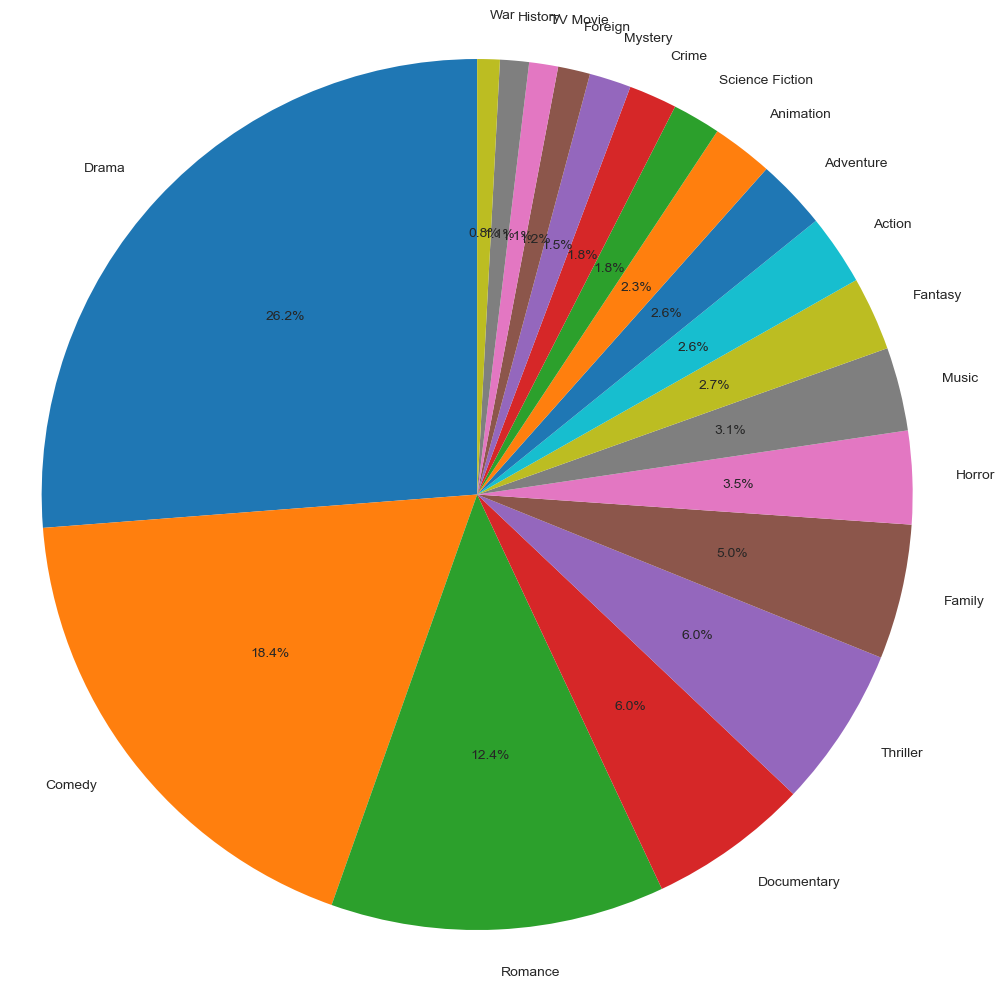

In [54]:
plot_pie(tmdb_movie_genre_counts_women, 'count', 'genres')

### Question 4: Table 6: Genres of movies without women directors:
The most frequent genres of movies without women directors are <b>Drama, Comedy, Thriller, Action, and Horror</b>

In [55]:
# List Genres decending order
tmdb_movie_genres_counts_not_women.head(20)

,genres,count
0,Drama,4541
1,Comedy,3639
2,Thriller,2858
3,Action,2363
4,Horror,1608
5,Romance,1608
6,Adventure,1449
7,Crime,1340
8,Science Fiction,1215
9,Family,1189


### Question 4: Graph 2: Genres for movies without women directors

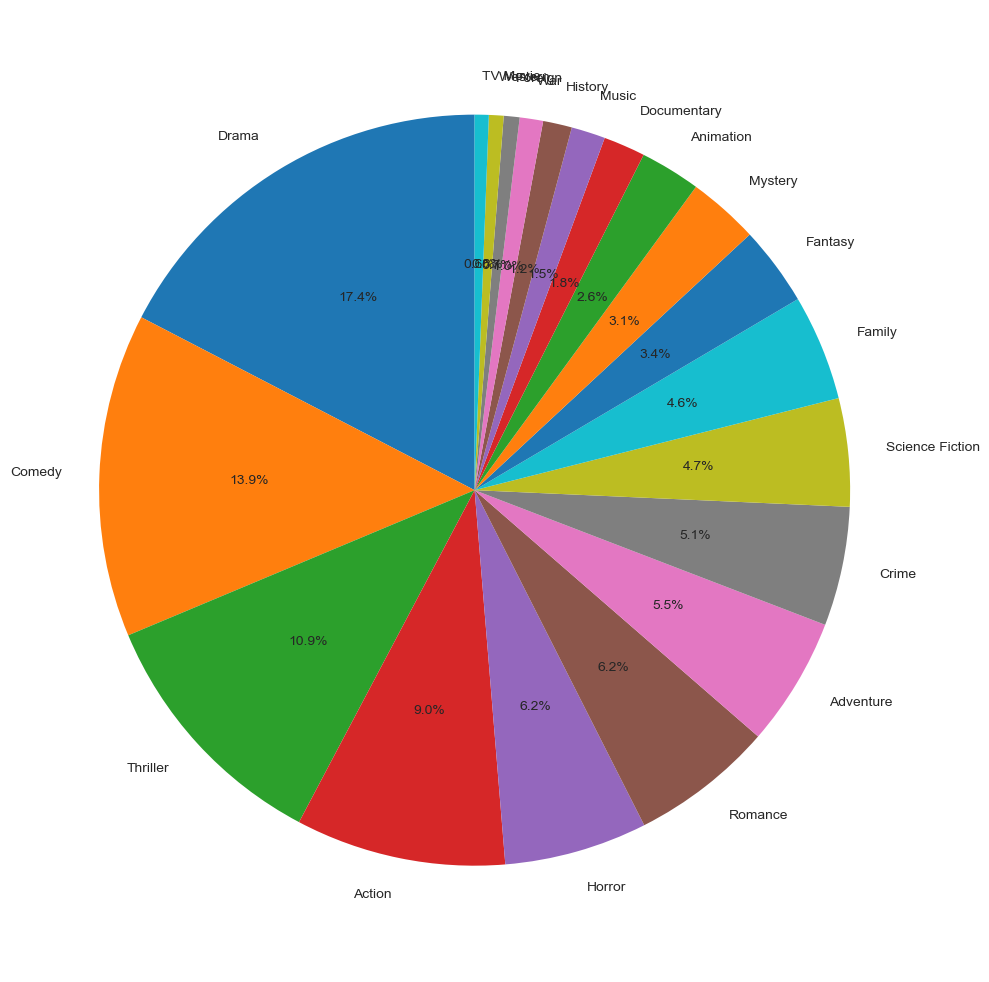

In [56]:
plot_pie(tmdb_movie_genres_counts_not_women, 'count', 'genres')

### Question 4: Table 7: Statistics for numerical properties for movies with women directors:

It is interesting that the release year for <b>first movie with woman director keyword was in 1971.</b>  The 50th and 75 percentiles are 2011 and 2013 respectively. This is a relativly recent trend and it will be interesting to track in the future.  

The vote average at the 75th percentile is the same <b>6.6</b> for both.

The popularity for for movies directed by women at the 75th percentile is much lower <b>.45 compared to 7.29.</b>

The release month for films directed by women at the 75th percentile is September (9) whereas movies not directed by women the release month at the 75th percentile is January (1).  When searching the internet for patterns for release of movies May thru August are the months for big budget summer release.  December and January are the key months for distributors looking to market their films for the upcoming award season.  

In [57]:
#Use describe for summary table of statistics for numeric columns
tmdb_movie_df_women.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,412.0,1.175414e+05,1.103937e+05,1360.000000,20769.750000,73226.000000,225708.000000,3.640670e+05
popularity,412.0,3.817693e-01,4.883036e-01,0.002165,0.157509,0.276512,0.453073,6.189369e+00
runtime,412.0,9.896117e+01,2.940320e+01,0.000000,88.000000,96.000000,105.250000,4.700000e+02
vote_count,412.0,6.969175e+01,1.670519e+02,10.000000,14.000000,24.000000,56.000000,1.937000e+03
vote_average,412.0,5.999272e+00,8.745242e-01,3.400000,5.300000,6.000000,6.600000,8.400000e+00
release_year,412.0,2.008095e+03,7.764995e+00,1971.000000,2006.000000,2011.000000,2013.000000,2.015000e+03
budget_adj,412.0,4.780453e+06,1.466934e+07,0.000000,0.000000,0.000000,713272.550173,1.619199e+08
revenue_adj,412.0,1.133415e+07,5.578766e+07,0.000000,0.000000,0.000000,7123.027368,5.240791e+08
release_month,412.0,6.628641e+00,3.444443e+00,1.000000,4.000000,7.000000,9.000000,1.200000e+01


### Question 4: Table 8: Statistics for numerical properties for movies with women directors

In [58]:
tmdb_movie_df_not_women.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,10431.0,6.382753e+04,9.057677e+04,5.000000,10480.500000,19803.000000,7.123100e+04,4.178590e+05
popularity,10431.0,6.579499e-01,1.014523e+00,0.000065,0.210596,0.388667,7.290910e-01,3.298576e+01
runtime,10431.0,1.022630e+02,3.136036e+01,0.000000,90.000000,99.000000,1.120000e+02,9.000000e+02
vote_count,10431.0,2.236642e+02,5.857193e+02,10.000000,17.000000,39.000000,1.520000e+02,9.767000e+03
vote_average,10431.0,5.972975e+00,9.365668e-01,1.500000,5.400000,6.000000,6.600000e+00,9.200000e+00
release_year,10431.0,2.001048e+03,1.289973e+01,1960.000000,1994.000000,2005.000000,2.011000e+03,2.015000e+03
budget_adj,10431.0,1.809414e+07,3.478651e+07,0.000000,0.000000,0.000000,2.193446e+07,4.250000e+08
revenue_adj,10431.0,5.305872e+07,1.469570e+08,0.000000,0.000000,0.000000,3.623006e+07,2.827124e+09
release_month,10431.0,6.835299e+00,3.440148e+00,1.000000,4.000000,7.000000,1.000000e+01,1.200000e+01


<a id='conclusions'></a>
## Conclusions

For this exploration I have focused on looking at several numeric values namely popularity, weighted vote average, release year, release month, and release decade.  I focused my analysis on data that had entries for about 80% of the movies.  

The popularity field however is questionable. It is calculated based on user interactions on the IMDB data website.  For further analysis I would suggest comparing to other popularity scores such as Rotten Tomatoes or Netflix. I did not analyze on budget and revenue fields because about 50% had zero values.

For categorical data I have looked at the genre and keywords.

Interesting differences and changes over time are noted above near the table and graphs for each and I won't repeat them here. 

For the final question I broke the dataset into two groups and drilled into the woman director keyword. I didn't start out looking at this question but it was something that emerged from the previous analysis.  
I am interested in following up on the trends for women directors and other diverse groups in the entertainment industry.  The IMDB database doesn't contain all diversity statistics but perhaps other datasets do.  The genre of the films, support from large production companies and the timing of movie release months are different and notable between the two groups.  There has been some recent progress but it is clear there is more to do to ensure support for diversity in what the public sees for movie entertaint.